importing libraries pandas for work to do with dataframe analyse numpy metrics

In [3]:
import pandas as pd
import numpy as np

libraries for plots chats

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
from datetime import datetime

In [6]:
# uploading dataset into our working enviornment
from google.colab import files
uploaded = files.upload()

Saving Stock Exchange KSE 100(Pakistan).csv to Stock Exchange KSE 100(Pakistan).csv


In [18]:
df_orignal = pd.read_csv('Stock Exchange KSE 100(Pakistan).csv')
df_orignal.head()

,Date,Open,High,Low,Close,Change,Volume
0,23-Feb-21,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
1,22-Feb-21,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2,19-Feb-21,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
3,18-Feb-21,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
4,17-Feb-21,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


In [20]:
df_orignal.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Volume'], dtype='object')

this dataset of "Pakistan Stock Exchange
(KSE 100)" I coleelected it from Kaggle here iam providing link "https://www.kaggle.com/datasets/zusmani/pakistan-stock-exchange-kse-100" it has 3221 rows and 7 columns first column at zero index is 'Date' , 2nd 'Open' 3rd 'High', 4th'Low', 5th 'Close', 6th 'Change' and 7th that is at index 6 is 'Volume'

In [119]:
df_orignal.describe()

,Date,Open,High,Low,Close,Change,Volume
count,3221,3221,3221,3221,3221,3221,3221
unique,3221,3213,3215,3211,3209,3104,3220
top,23-Feb-21,"29,269.00","24,777.37","6,639.00","6,639.25",0,"302,831,072"
freq,1,2,2,3,3,5,2


df_orignal.describe() tells us that each of our column has 3221 entries in date column 3221 unique entries we can say there are no duplicated rows  what is top value of a column 23-Feb-21 this is the first entry of our dataset from this date to backward our data set is frq 1 of date column once agin conirmed our point that there are no duplicated rows

In [122]:
# checking for duplicated rows
duplicated_rows = df_orignal.duplicated().sum()
print(duplicated_rows)

0


In [123]:
df_orignal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3221 non-null   object
 1   Open    3221 non-null   object
 2   High    3221 non-null   object
 3   Low     3221 non-null   object
 4   Close   3221 non-null   object
 5   Change  3221 non-null   object
 6   Volume  3221 non-null   object
dtypes: object(7)
memory usage: 176.3+ KB


our data set has 3220 rows 7 columns we can see there are zero NaN values we have numrical dataset but it show us object type my be beacuse of ",-" type special characters or may be they are in strings form due to "" we will convert them in their proper format almost 176 kb size

In [124]:
df_orignal.shape

(3221, 7)

we dont want to make any changes in our data set during our tasks so we will make a copy of origanl data set and will play with it

In [118]:
df = df_orignal.copy()
df.head()

,Date,Open,High,Low,Close,Change,Volume
0,23-Feb-21,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
1,22-Feb-21,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2,19-Feb-21,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
3,18-Feb-21,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
4,17-Feb-21,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


In [22]:
df.dtypes

,0
Date,object
Open,object
High,object
Low,object
Close,object
Change,object
Volume,object


we can see all of our numerical columns or of object type Date column should b of date64 type and rest should b of float64 or int64 so we have to convert them to there orignal format

In [23]:
df['Date'].dtype

dtype('O')

to convert date type we will use pandas built in function  "pandas.to_datetime()"

In [24]:
# Converting the 'Date' column to date format
df['Date'] = pd.to_datetime(df['Date'],
                            format='%d-%b-%y'
                              # dtype='datetime64[ns, UTC-05:00]', freq=None
                            )
df['Date'].dtype

dtype('<M8[ns]')

it is converted successfully

In [25]:
# checking for minmum and max date
minimum_date =df['Date'].min()
maximum_date = df['Date'].max()
# print(minimum_date)
print( f"starting date is:{minimum_date} ending date is{maximum_date}" )
# print(maximum_date)

starting date is:2008-02-22 00:00:00 ending date is2021-02-23 00:00:00


we can see our data set is from feb 2008 to feb 2021 almost 13 years of data we have

now we will set column Date as our index

In [26]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Change,Volume
Date,,,,,,
2021-02-23,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
2021-02-22,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2021-02-19,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
2021-02-18,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
2021-02-17,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


now we will convert our remaining columns to numeric type but first we remove special characters using python regix method

In [27]:
df =df.replace('[^\d.]', '', regex=True)
df

,Open,High,Low,Close,Change,Volume
Date,,,,,,
2021-02-23,31722.16,31800.90,31597.31,31626.19,21.38,718191025
2021-02-22,31874.78,31958.58,31612.55,31647.57,203.61,721952658
2021-02-19,31748.75,31904.30,31749.43,31851.18,91.36,694795084
2021-02-18,32049.85,32104.67,31745.72,31759.82,288.86,577837595
2021-02-17,32166.21,32390.77,32044.01,32048.68,93.15,701658181
...,...,...,...,...,...,...
2008-02-28,10688.98,10724.21,10655.23,10704.15,39.79,325539584
2008-02-27,10670.68,10732.92,10623.36,10664.36,3.99,396419776
2008-02-26,10596.40,10668.35,10578.01,10668.35,79.51,265668784


In [28]:
df['Open'].dtype

dtype('O')

it is still 'object type' so we will use pandas pandas_to.numeric()" function

In [29]:
# converting column Open to its type
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['Open'].dtype

dtype('float64')

In [30]:
df['Open'].tail()

,Open
Date,
2008-02-28,10688.98
2008-02-27,10670.68
2008-02-26,10596.40
2008-02-25,10625.66
2008-02-22,10634.22


sorting of index date

In [31]:
df = df.sort_index(ascending=True)
df.head()

,Open,High,Low,Close,Change,Volume
Date,,,,,,
2008-02-22,10634.22,10635.42,10546.38,10607.29,0,313082688
2008-02-25,10625.66,10709.06,10579.49,10588.84,18.45,273149184
2008-02-26,10596.40,10668.35,10578.01,10668.35,79.51,265668784
2008-02-27,10670.68,10732.92,10623.36,10664.36,3.99,396419776
2008-02-28,10688.98,10724.21,10655.23,10704.15,39.79,325539584


now we will conver rest of our columns at once using for loop

In [32]:
# converting all columns to from array type to int r float type
for cols in df.columns:
    if df[cols].dtype == 'object':
        df[cols] = pd.to_numeric(df[cols], errors='coerce')

df.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Change,float64
Volume,int64


In [33]:
df.index

DatetimeIndex(['2008-02-22', '2008-02-25', '2008-02-26', '2008-02-27',
               '2008-02-28', '2008-02-29', '2008-03-03', '2008-03-04',
               '2008-03-05', '2008-03-06',
               ...
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-22', '2021-02-23'],
              dtype='datetime64[ns]', name='Date', length=3221, freq=None)

checking for missing values

In [37]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Change,0
Volume,0


there is no missing values in our dataset but we  we will  intentionly add  some nan values in our data to see how to fill mising values or drop them

In [98]:
np.random.seed(42)
nan_values = 10
# we will add randomly
for _ in range(nan_values):
  rows =np.random.randint(0, df.shape[0] - 1)
  cols =np.random.choice(df.columns)
  df.loc[rows, cols] = np.nan



In [99]:
df.isna().sum()

,0
Open,20
High,20
Low,20
Close,20
Change,20
Volume,20
price_change_rate,20
moving _avg_close,20
Rolling Volatility,30


orignally there was no nan values but we intentionaly added some and now we can there are mising values .

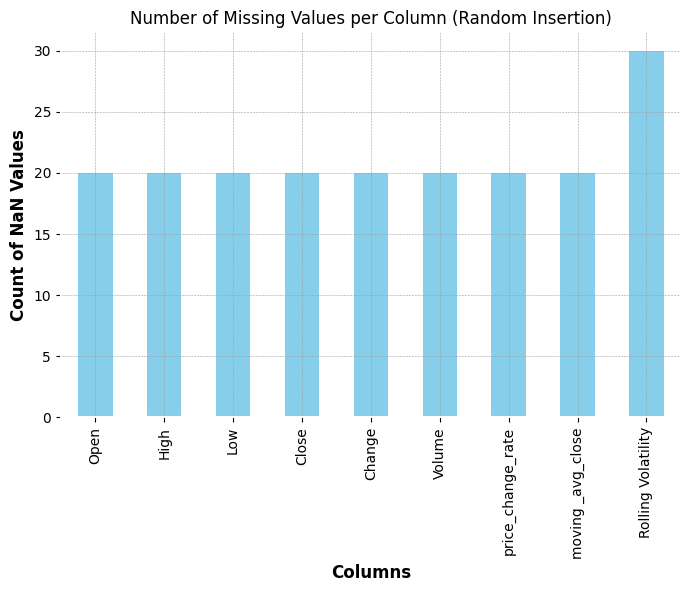

In [100]:
plt.figure(figsize=(8, 5))
df.isna().sum().plot(kind='bar', color='skyblue')
plt.title("Number of Missing Values per Column (Random Insertion)")
plt.ylabel("Count of NaN Values")
plt.xlabel("Columns")
plt.show()


20 rows of our data set now has missing values we tried to visualise them through bar chart we can drop these rows or we can fill them with diffrent approaches like fill them with some sring or zero or mean mode midean or any particular value or with some percentage we will use mode of each column to fill these missing values

In [103]:
# mode most frequent value
for cols in df.columns:
  mode_value_columns = df[cols].mode()[0]
  df[cols].fillna(mode_value_columns, inplace=True)


In [104]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Change,0
Volume,0
price_change_rate,0
moving _avg_close,0
Rolling Volatility,0


now again there are no NaN values in our dataset as we have replaced them with mode of the column

question?? what is the corelation of the feature of data set??
to answer this we will draw a heatmap and will observe what is colinearity of features

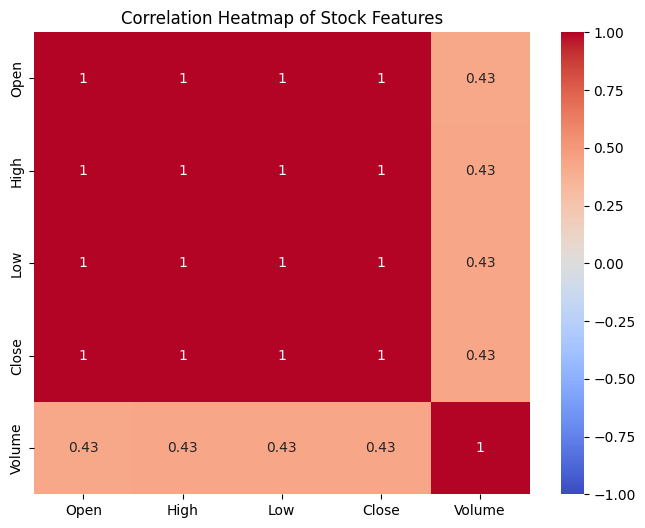

In [65]:
#  Create a correlation matrix
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Stock Features')
plt.show()

we observed that colineart of features to there self is very strong but with other features it is moderate

Box plot of features we will use seaborn

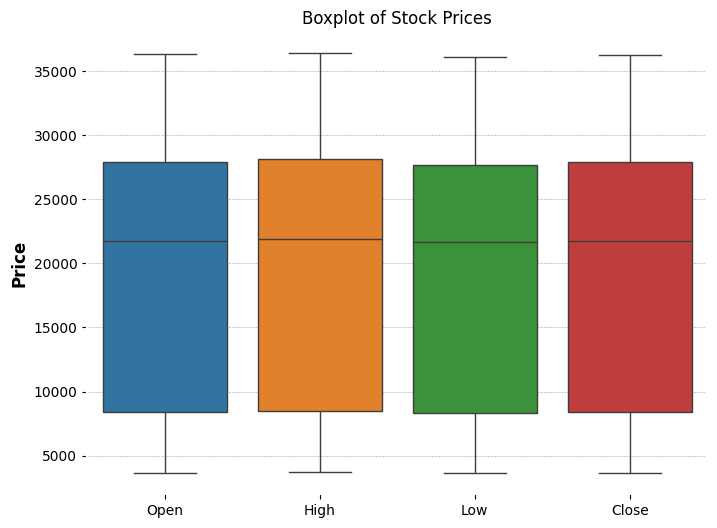

In [85]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot of Stock Prices')
plt.ylabel('Price')
plt.show()

we will draw our  plot of column 'Close' and 'Date' to analyse trend of Close price with time

what is trend of Close price over time

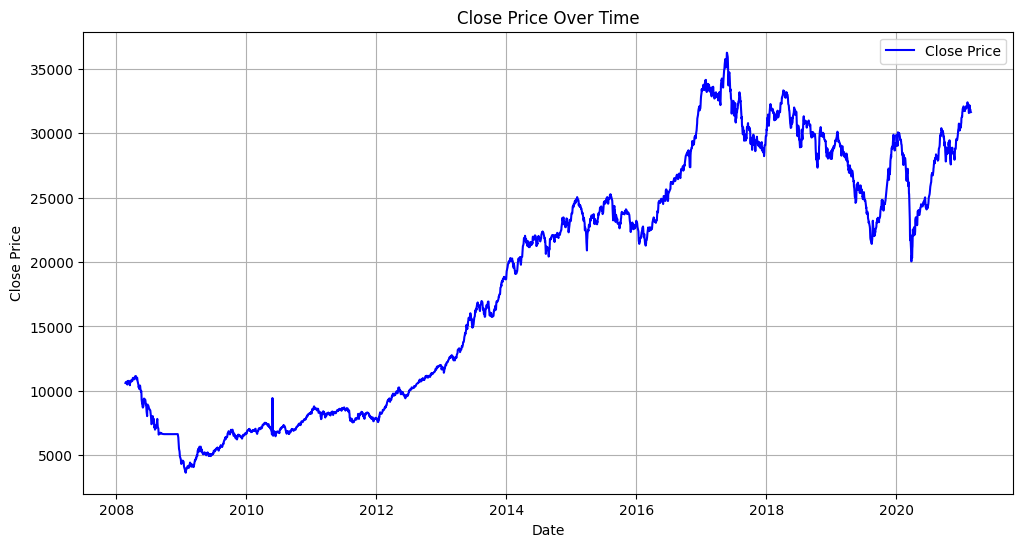

In [38]:
# ploting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

we can see the up and down of 'Close' in between 2008 to 2010 it was at its lowest
and before 2018 it was at its peak

now we will calculate moving average of column close we will use window 21 as there are 21 working days of a month and we will add a new column in our data set

what is overall trend of stock exchange of pakistan over time?

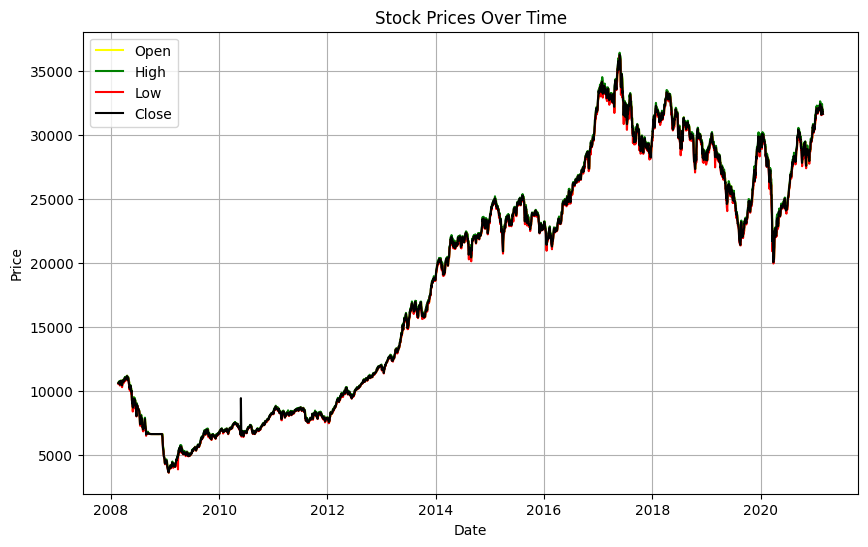

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Open'], label='Open', color='yellow')
plt.plot(df.index, df['High'], label='High', color='green')
plt.plot(df.index, df['Low'], label='Low', color='red')
plt.plot(df.index, df['Close'], label='Close', color='black')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

the above graph show us ups and downs of our stock exchange data during 2008 to 2010 it was at lowest and near 2018 it was at its peak

In [40]:
lowest_closing_price = df['Close'].nsmallest(10)
highest_closing_price = df['Close'].nlargest(10)
print(f"lowest_closing_prices{lowest_closing_price},highest_closing_prices:{highest_closing_price}")

lowest_closing_pricesDate
2009-01-26    3647.10
2009-01-23    3725.32
2009-01-27    3755.26
2009-01-22    3789.09
2009-01-28    3868.14
2009-01-21    3870.97
2009-01-29    3886.59
2009-01-20    3960.40
2009-01-19    3973.25
2009-02-02    3987.15
Name: Close, dtype: float64,highest_closing_prices:Date
2017-05-24    36234.20
2017-05-25    36224.38
2017-05-26    36130.33
2017-05-29    35900.75
2017-05-23    35863.66
2017-05-15    35740.31
2017-05-30    35533.47
2017-05-22    35432.12
2017-05-16    35417.00
2017-05-12    35355.64
Name: Close, dtype: float64


abvoe code shows ten lowest Closing price with their index date and 10 higest Closing price with there index date

now we will plot ten lowest closing days and 10 highest closing price

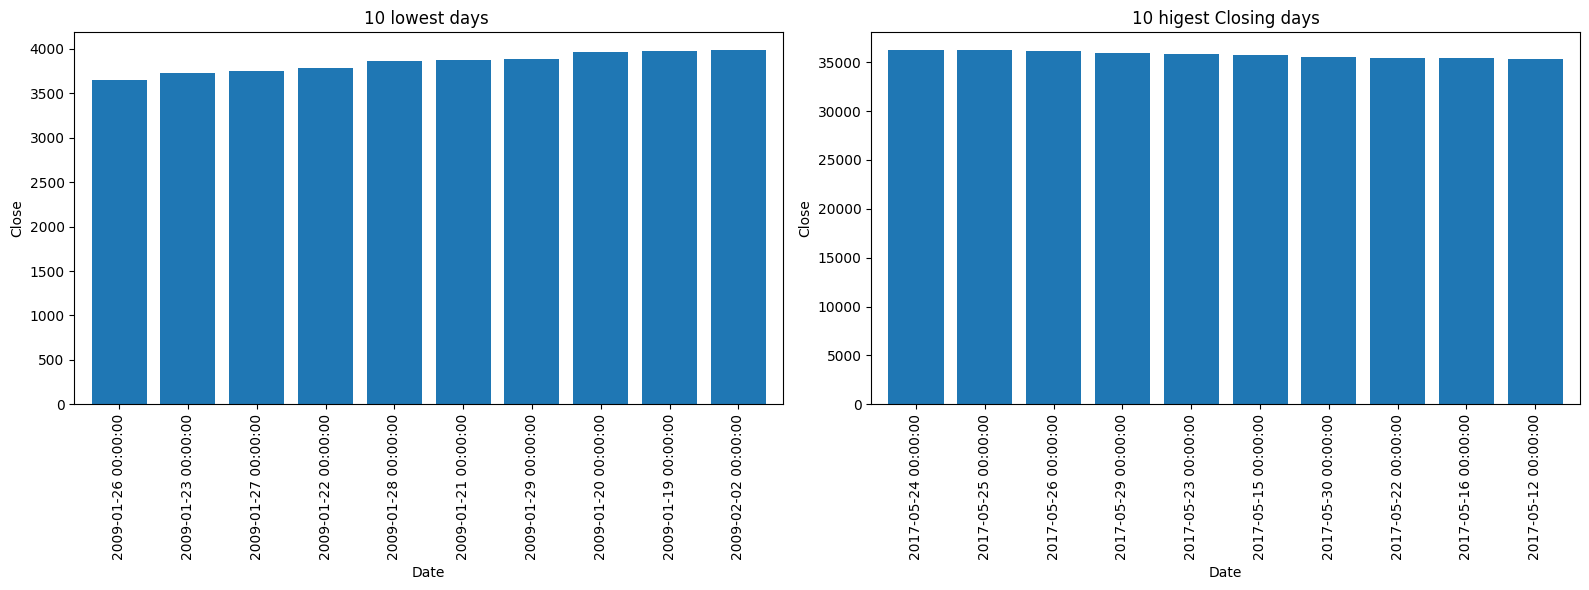

In [50]:
lowest_closing_price = df['Close'].nsmallest(10)
highest_closing_price = df['Close'].nlargest(10)
# lowest_closing_price.plot(kind= 'bar', x='lowest_closing_price', y='index')
# plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
lowest_closing_price .plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('10 lowest days ')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close')
axes[0].tick_params(axis='x', rotation=90)


highest_closing_price.plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('10 higest Closing days')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Close')
axes[1].tick_params(axis='x', rotation=90)



plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00


first and last 21 working days days

In [41]:
frst_21_days = df.head(21)
last_21_days = df.tail(21)
print(f"frst_21_days:{frst_21_days},last_21_days:{last_21_days}")

frst_21_days:                Open      High       Low     Close  Change     Volume
Date                                                                 
2008-02-22  10634.22  10635.42  10546.38  10607.29    0.00  313082688
2008-02-25  10625.66  10709.06  10579.49  10588.84   18.45  273149184
2008-02-26  10596.40  10668.35  10578.01  10668.35   79.51  265668784
2008-02-27  10670.68  10732.92  10623.36  10664.36    3.99  396419776
2008-02-28  10688.98  10724.21  10655.23  10704.15   39.79  325539584
2008-02-29  10726.05  10750.60  10618.88  10635.69   68.46  335109824
2008-03-03  10658.04  10663.51  10501.10  10554.05   81.64  196083664
2008-03-04  10585.64  10606.35  10420.64  10487.61   66.44  217864448
2008-03-05  10521.65  10653.56  10521.65  10643.06  155.45  267425136
2008-03-06  10718.81  10792.53  10718.81  10769.39  126.33  321543552
2008-03-07  10777.36  10799.27  10690.48  10741.91   27.48  291107200
2008-03-10  10790.34  10792.40  10595.15  10616.98  124.93  185722736
2008-03

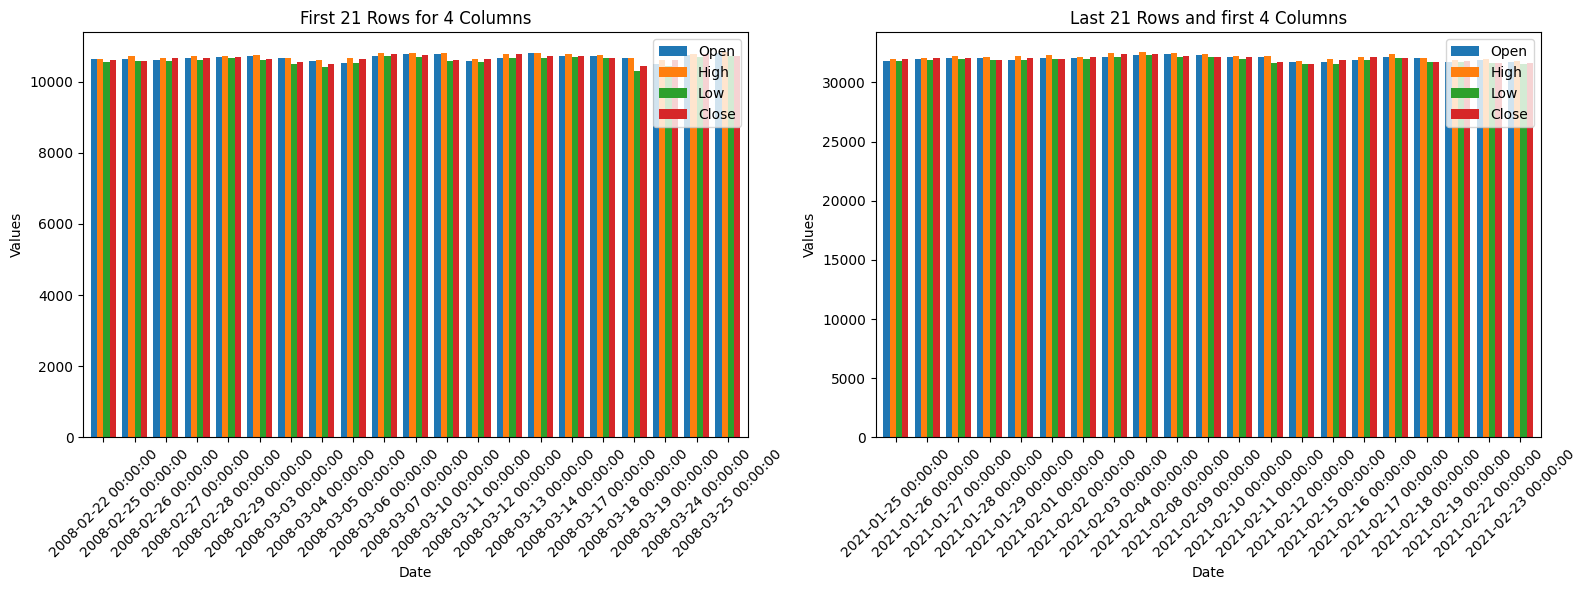

In [42]:
# frst_21_days selecticng first 4 columns
features = frst_21_days.iloc[:, :4]
features2 = last_21_days.iloc[:, :4]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
features.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('First 21 Rows for 4 Columns')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Values')
axes[0].tick_params(axis='x', rotation=45)




features2.plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('Last 21 Rows and first 4 Columns')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Values')
axes[1].tick_params(axis='x', rotation=45)

# .plot(kind='bar', figsize=(10, 6), width=0.8)
# plt.hist(features)
plt.xlabel('Date')
plt.ylabel('Values')
# plt.title('Bar Chart of First 21 Rows and 4 Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


no we will plot minimum 10 values of closing price with date index

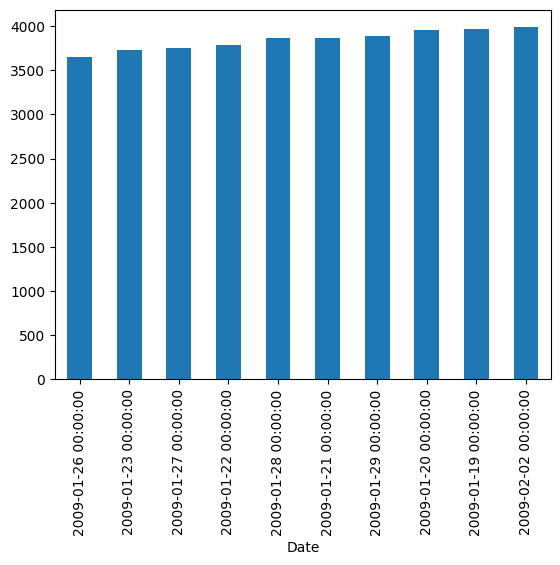

In [52]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.8 MB/s eta 0:00:00


In [53]:
import mplfinance as mpf

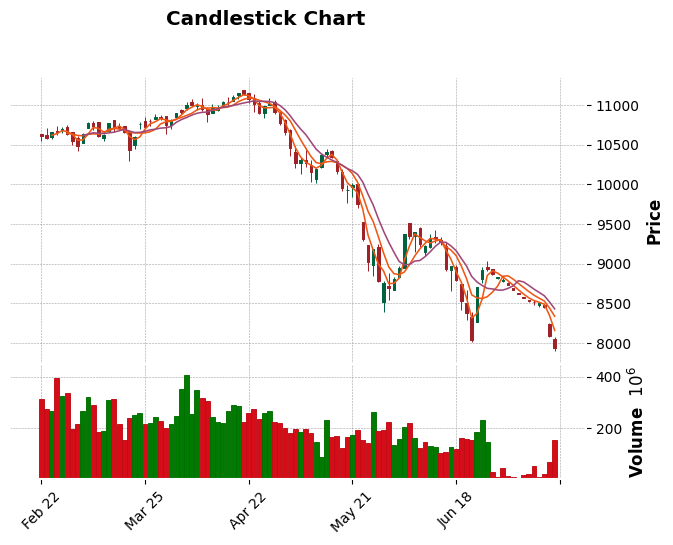

In [69]:
# Plotting a candlestick chart
mpf.plot(df.head(100), type='candle', style='charles', volume=True, title='Candlestick Chart', mav=(3,6,9))

volume over time

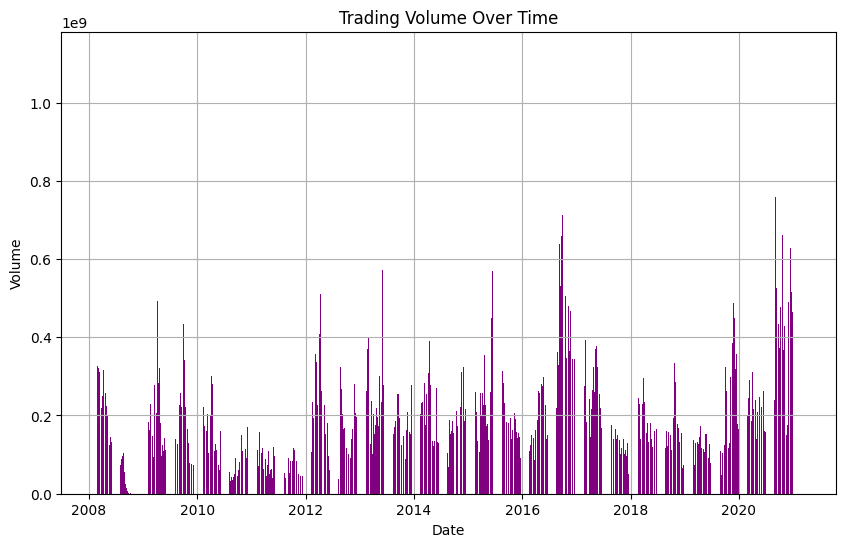

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Volume'], color='purple')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

what was minimum volume and when it was ?? what was higest Volume and when it  was

In [72]:
df['Volume'].idxmin()
df['Volume'].min()
df['Volume'].idxmax()
df['Volume'].max()
print(f"at{df['Volume'].idxmin()}was we was at lost Volume of {df['Volume'].min()}, at this day:{df['Volume'].idxmax()}we was having maximum volume of:{df['Volume'].max()}")

at2008-11-18 00:00:00was we was at lost Volume of 19660, at this day:2021-02-11 00:00:00we was having maximum volume of:1124724205


question:what is percentage change of Close price ??
to anser this we will calculate perctage change of the column by using built in function  and we will save it in a new column of dataset

In [56]:
df['price_change_rate'] = df['Close'].pct_change() * 100
df['price_change_rate']

,price_change_rate
Date,
2008-02-22,NaN
2008-02-25,-0.173937
2008-02-26,0.750885
2008-02-27,-0.037400
2008-02-28,0.373112
...,...
2021-02-17,-0.289809
2021-02-18,-0.901316
2021-02-19,0.287659


In [57]:
df['price_change_rate'].isna().sum()

1

we calculated perctage chage of column but there a nan value to we will replace it with next available entry by using replace method and fill it with zero

```
# This is formatted as code
```



In [58]:

df['price_change_rate'].replace(np.nan, 0, inplace=True)
# df['price_change_rate'].isna().sum()

In [59]:
df['price_change_rate'].isna().sum()

0

In [60]:
df.head(2)

,Open,High,Low,Close,Change,Volume,price_change_rate
Date,,,,,,,
2008-02-22,10634.22,10635.42,10546.38,10607.29,0.00,313082688,0.000000
2008-02-25,10625.66,10709.06,10579.49,10588.84,18.45,273149184,-0.173937


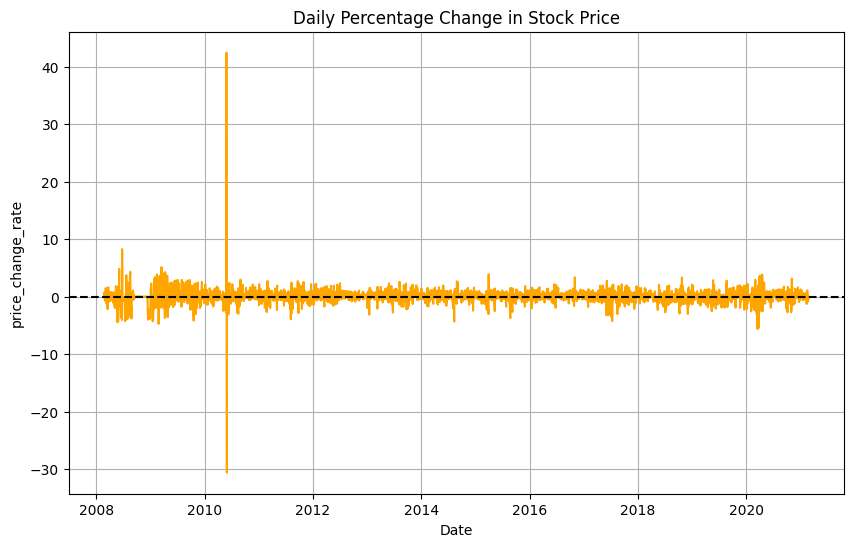

In [61]:
# df[''price_change_rate''] = df['Close'].pct_change() * 100

# Plot the daily percentage change
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['price_change_rate'], color='orange', label='Daily % Change')
plt.axhline(0, color='black', linestyle='--')
plt.title('Daily Percentage Change in Stock Price')
plt.xlabel('Date')
plt.ylabel('price_change_rate')
plt.grid(True)
plt.show()

In [62]:
# print(df['price_change_rate'].dtype)
df['price_change_rate'] = pd.to_numeric(df['price_change_rate'], errors='coerce')
print(df['price_change_rate'].dtype)


# print(df[['price_change_rate']].idxmin())
# pandas built in function.nsmalest(n) and nlarget(n)
min_10_values = df['price_change_rate'].nsmallest(10)
# print(df[['price_change_rate']].idxmax())
max_10_values = df['price_change_rate'].nlargest(10)
# print(df['price_change_rate'].max())
print(min_10_values,max_10_values)


float64
Date
2010-05-31   -30.655106
2020-03-16    -5.633174
2020-03-18    -5.505382
2020-03-24    -5.478773
2009-02-25    -4.756338
2008-05-23    -4.453293
2014-08-11    -4.339244
2008-05-28    -4.300764
2009-01-16    -4.295191
2008-07-14    -4.264257
Name: price_change_rate, dtype: float64 Date
2010-05-28    42.458980
2008-06-24     8.256877
2009-03-16     5.138386
2008-06-04     4.814691
2008-08-18     4.324893
2009-04-10     4.272731
2009-03-24     4.079381
2009-04-02     4.007716
2015-03-31     3.871711
2009-02-13     3.852268
Name: price_change_rate, dtype: float64


In [63]:
df['price_change_rate']['2010-05-31']

-30.65510583016544

when was price change rate was lowst and when was higest change rate

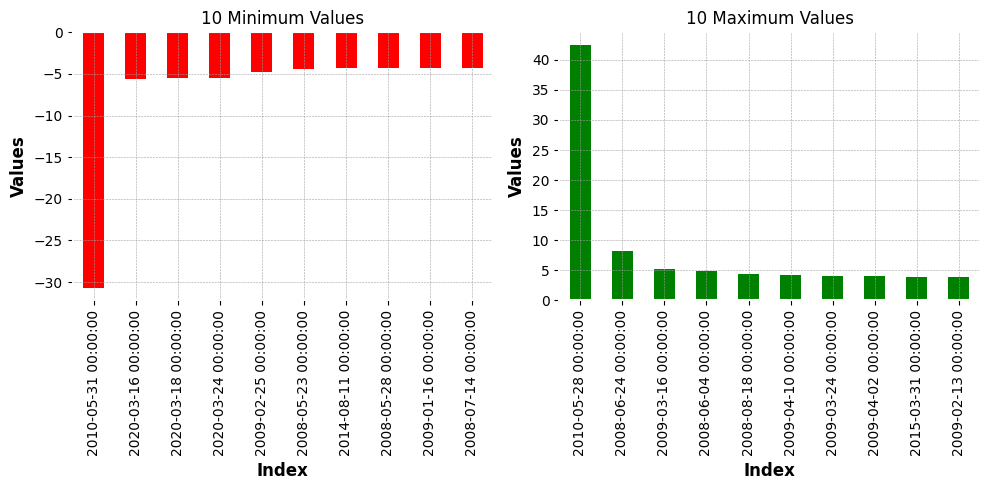

In [73]:
# xd ={'values':[min_10_values,max_10_values]}
# df = pd.DataFrame(xd, index=[f'row_{i}' for i in range(len(xd['values']))])
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # For the minimum values
min_10_values.plot(kind='bar', color='red')
plt.title('10 Minimum Values')
plt.xlabel('Index')
plt.ylabel('Values')


plt.subplot(1, 2, 2)  # For the maximum values
max_10_values.plot(kind='bar', color='green')
plt.title('10 Maximum Values')
plt.xlabel('Index')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

we observed from graph maximum rate change both inresing and decresing was during

what will be distribution of of pririce change rate
distribution of daily returns

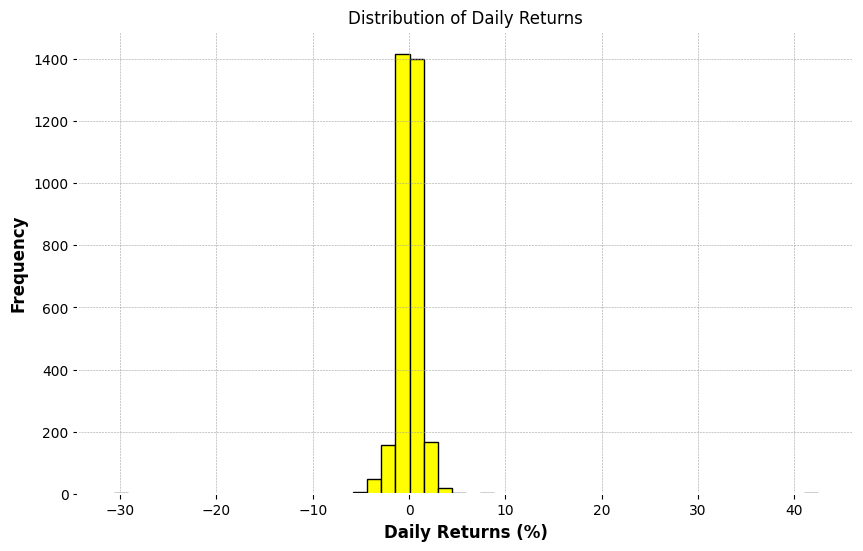

In [87]:
plt.figure(figsize=(10, 6))
plt.hist(df['price_change_rate'].dropna(), bins=50, color='yellow', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

what will be the moving average of Close price
to anser this question we will calculate moving avg with mean()function store it in our data frame and we will visualise it

In [75]:
df ['moving _avg_close'] = df ['Close'] .rolling(window=21).mean()
df.head()

,Open,High,Low,Close,Change,Volume,price_change_rate,moving _avg_close
Date,,,,,,,,
2008-02-22,10634.22,10635.42,10546.38,10607.29,0.00,313082688,0.000000,NaN
2008-02-25,10625.66,10709.06,10579.49,10588.84,18.45,273149184,-0.173937,NaN
2008-02-26,10596.40,10668.35,10578.01,10668.35,79.51,265668784,0.750885,NaN
2008-02-27,10670.68,10732.92,10623.36,10664.36,3.99,396419776,-0.037400,NaN
2008-02-28,10688.98,10724.21,10655.23,10704.15,39.79,325539584,0.373112,NaN


we calulated moving avg and added a column in our data set 'moving_avg_Close' but we have some mising values for first 20 entries

In [76]:
df['moving _avg_close'].isna().sum()

20

to drop 20 rows i think is not a good idea so we will use mean of column 'moving_avg_CLose' to fill NaN values

In [77]:
# here we will create a new veriable and store mean value in it
moving_avg_close_mean = df['moving _avg_close'].mean()
moving_avg_close_mean

18786.161856413917

now we will use pandas fillna method to fill mising values in column 'moving_avg_Close'

In [78]:
# filling NaN values with mean or avg of that column

df['moving _avg_close'].fillna(moving_avg_close_mean, inplace=True)
df

,Open,High,Low,Close,Change,Volume,price_change_rate,moving _avg_close
Date,,,,,,,,
2008-02-22,10634.22,10635.42,10546.38,10607.29,0.00,313082688,0.000000,18786.161856
2008-02-25,10625.66,10709.06,10579.49,10588.84,18.45,273149184,-0.173937,18786.161856
2008-02-26,10596.40,10668.35,10578.01,10668.35,79.51,265668784,0.750885,18786.161856
2008-02-27,10670.68,10732.92,10623.36,10664.36,3.99,396419776,-0.037400,18786.161856
2008-02-28,10688.98,10724.21,10655.23,10704.15,39.79,325539584,0.373112,18786.161856
...,...,...,...,...,...,...,...,...
2021-02-17,32166.21,32390.77,32044.01,32048.68,93.15,701658181,-0.289809,32004.579048
2021-02-18,32049.85,32104.67,31745.72,31759.82,288.86,577837595,-0.901316,32002.106667
2021-02-19,31748.75,31904.30,31749.43,31851.18,91.36,694795084,0.287659,32008.238571


In [79]:
df['moving _avg_close'].isna().sum()

0

we have replaced nan values with avg of that column but we need to make it round to two decimal point by using pythons round function

In [80]:
# builtin round function
df['moving _avg_close'] = df['moving _avg_close'].round(2)
df['moving _avg_close'].head()

,moving _avg_close
Date,
2008-02-22,18786.16
2008-02-25,18786.16
2008-02-26,18786.16
2008-02-27,18786.16
2008-02-28,18786.16


In [81]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Change,0
Volume,0
price_change_rate,0
moving _avg_close,0


In [82]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Volume', 'price_change_rate',
       'moving _avg_close'],
      dtype='object')

Text(0.5, 0, 'Date')

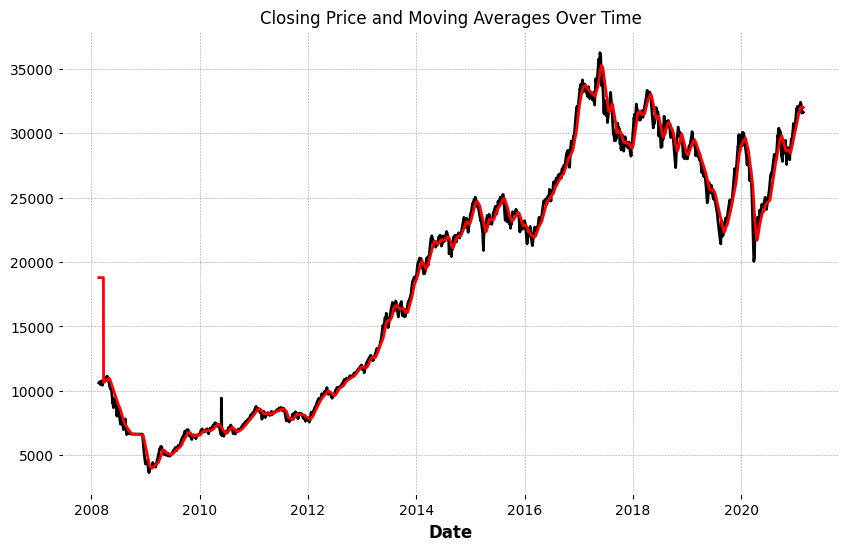

In [83]:
# df['moving _avg_close'] = df['Close'].rolling(window=21).mean()
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='black')
plt.plot(df.index, df['moving _avg_close'], label='21 day moving average', color='red')
plt.title('Closing Price and Moving Averages Over Time')
plt.xlabel('Date')



how much is our stock stock voaltile??to calculatue volatility we will use pandas built in function of standard deviation and we will calulate with 21 windows mean 21 working days of a month

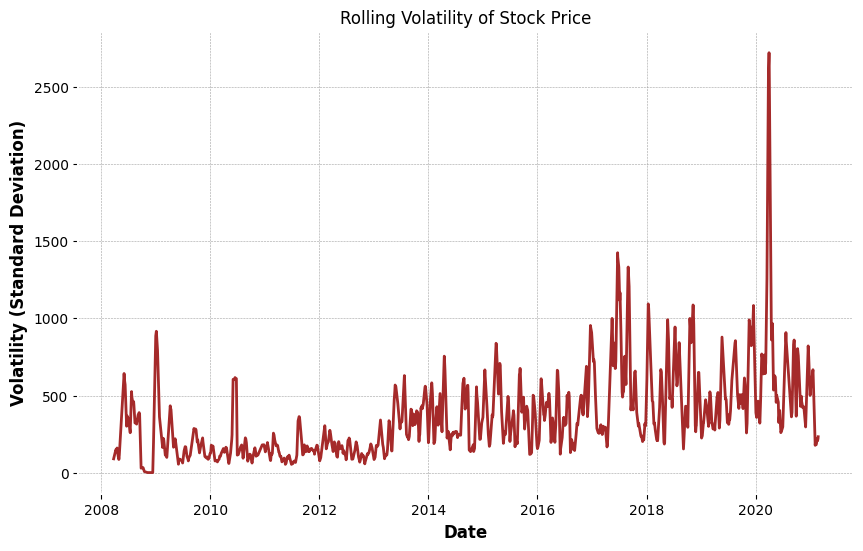

In [84]:
df['Rolling Volatility'] = df['Close'].rolling(window=21).std()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Rolling Volatility'], color='brown', label='Rolling 21-Day Volatility')
plt.title('Rolling Volatility of Stock Price')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.grid(True)
plt.show()

by observing above plot we can say our stock markeet is over all stable as standard deviation remains mostly low no fluctuations early 2020 was a sign of unstability as standard deviation was high

In [106]:
df.head(5)

,Open,High,Low,Close,Change,Volume,price_change_rate,moving _avg_close,Rolling Volatility
Date,,,,,,,,,
2008-02-22 00:00:00,6639.13,6640.48,6639.0,6639.25,0.0,302831072.0,0.0,18786.16,0.360535
2008-02-25 00:00:00,6639.13,6640.48,6639.0,6639.25,0.0,302831072.0,0.0,18786.16,0.360535
2008-02-26 00:00:00,6639.13,6640.48,6639.0,6639.25,0.0,302831072.0,0.0,18786.16,0.360535
2008-02-27 00:00:00,6639.13,6640.48,6639.0,6639.25,0.0,302831072.0,0.0,18786.16,0.360535
2008-02-28 00:00:00,6639.13,6640.48,6639.0,6639.25,0.0,302831072.0,0.0,18786.16,0.360535


untill now we have convertd our dataset into proper format from objact type to numeric type then we inserted NaN values then we removed them we created som new columns with some calculation our data is cleaned now we checked for duplicated rows we visualise diffrent asspect of our data set

In [112]:
df_orignal.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Volume'], dtype='object')

In [113]:
df_orignal.shape

(3221, 7)

In [114]:
df.shape

(3231, 9)

In [115]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Volume', 'price_change_rate',
       'moving _avg_close', 'Rolling Volatility'],
      dtype='object')

now we will split our data set into test and train set